# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></div><div class="lev1 toc-item"><a href="#Read-imcat-output-text" data-toc-modified-id="Read-imcat-output-text-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read imcat output text</a></div><div class="lev1 toc-item"><a href="#Create-new-columns" data-toc-modified-id="Create-new-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create new columns</a></div><div class="lev1 toc-item"><a href="#Objects-with-bad-density-0.6-<-gm_sq-<-1.0" data-toc-modified-id="Objects-with-bad-density-0.6-<-gm_sq-<-1.0-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Objects with bad density 0.6 &lt; gm_sq &lt; 1.0</a></div><div class="lev1 toc-item"><a href="#Distribution-of-gm_sq-All-data" data-toc-modified-id="Distribution-of-gm_sq-All-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Distribution of gm_sq All data</a></div><div class="lev1 toc-item"><a href="#Distribution-of-gmsq-Zoom" data-toc-modified-id="Distribution-of-gmsq-Zoom-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Distribution of gmsq Zoom</a></div><div class="lev1 toc-item"><a href="#Script" data-toc-modified-id="Script-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Script</a></div>

# Introduction
Date: Nov 1, 2019

final_text.txt is created by imcat program after merging four lsst files (m,m9,l,l9)
after cleaning.

- DMSTACK gives csv files with lots of nans
- We need to remove nans, and select few columns, and do some filtering.
- After doing cleaning and using IMCAT to combine m,m9,l,l9 text files
  I got final_text.txt file which have columns like gm0 and gm1.
- I plotted the number density of gmsq = gm0_sq + gm1_sq and saw that
  there was a bump in the number density when 0.7 < gmsq < 1.0.
- About 10% objects were bad objects (i.e. 0.7 < gmsq < 1.0).


The filtering used to get clean text files from unclean dmstack csv files are given below:
#-------------------------------------------------------------
```
original dmstack output: src_lsst90_z1.5_000.csv,   shape = (7610, 167)
add two columns ellip and radius, shape = (7610, 169)
```



```python
cols_imp = ['base_GaussianCentroid_flag',
       'base_GaussianCentroid_flag_resetToPeak', 'base_SdssCentroid_flag',
       'base_SdssCentroid_flag_edge',
       'base_SdssCentroid_flag_almostNoSecondDerivative',
       'base_SdssCentroid_flag_notAtMaximum',
       'base_SdssCentroid_flag_resetToPeak',
       'base_SdssShape_flag_unweightedBad',
       'base_SdssShape_flag_unweighted', 'base_SdssShape_flag_maxIter',
       'ext_shapeHSM_HsmPsfMoments_flag',
       'ext_shapeHSM_HsmPsfMoments_flag_galsim',
       'ext_shapeHSM_HsmSourceMoments_flag',
       'ext_shapeHSM_HsmSourceMoments_flag_galsim',
       'base_CircularApertureFlux_3_0_flag',
       'base_CircularApertureFlux_4_5_flag',
       'base_CircularApertureFlux_4_5_flag_sincCoeffsTruncated',
       'base_CircularApertureFlux_6_0_flag',
       'base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated',
       'base_CircularApertureFlux_9_0_flag',
       'base_CircularApertureFlux_12_0_flag',
       'base_CircularApertureFlux_12_0_flag_apertureTruncated',
       'base_CircularApertureFlux_17_0_flag',
       'base_CircularApertureFlux_17_0_flag_apertureTruncated',
       'base_GaussianFlux_flag', 'base_PsfFlux_flag',
       'base_PsfFlux_flag_edge', 'base_ClassificationExtendedness_flag']

```

**Attempt 1**
Usual filtering:
```
calib_psfCandidate == 0.0
deblend_nChild == 0.0
ellip < 1.5
after filtering, shape = (2315, 169)   # from 7.6k to 2.3k
    
    
    
all objects = 183,832
bad objects = 23,444
bad objects percentage = 12.75% 
```
![](results/a01_orig_gmsq_kde_whole_data.png)
![](results/a02_orig_gmsq_kde_zoom.png)


**Attempt 2**
Use all those 28 filterings.
This gives extremely low number of objects. If we exclude nans there are ZERO
objects. So I will include nans in errx and erry.
```
if all 28 flags == False:
    object is good (0.6 < gmsq < 1.0)
else:
    object is bad.
    
    
all objects = 183,830
bad objects = 23,444
bad objects percentage = 12.75% 
```
![](results/b01_gmsq_kde_whole_data.png)
![](results/b02_gmsq_kde_zoom.png)


**Attempt 3**
Take few columns from 28 features and choose only rows
where these features equal zero.
```
all objects = 183,830
bad objects = 23,444
bad objects percentage = 12.75% 

```
![](results/c01_few_gmsq_kde_whole_data.png)
![](results/c02_few_gmsq_kde_zoom.png)


# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

pd.set_option('display.max_columns',200)

import matplotlib.pyplot as plt
%matplotlib inline

# Read imcat output text

In [2]:
!head -n 2 final/final_text.txt

#       fN[0][0]       fN[1][0]       fN[2][0]       fN[3][0]       id[0][0]       id[1][0]       id[2][0]       id[3][0]           x[0]           x[1]     errx[0][0]     errx[0][1]     errx[1][0]     errx[1][1]     errx[2][0]     errx[2][1]     errx[3][0]     errx[3][1]        g[0][0]        g[0][1]        g[1][0]        g[1][1]        g[2][0]        g[2][1]        g[3][0]        g[3][1]    shear[0][0]    shear[1][0]    shear[2][0]    shear[3][0]     flux[0][0]     flux[1][0]     flux[2][0]     flux[3][0]   radius[0][0]   radius[1][0]   radius[2][0]   radius[3][0]          gm[0]          gm[1]          gc[0]          gc[1]
               0              0              0              0           5678           5735           5568           5678      1969.2159      2159.7569         0.1046         0.0759         0.1063         0.0745         0.1055         0.0759          0.107         0.0746          1.083        -0.2341         1.1499        -0.4244         1.1705        -0.2617       

In [3]:
colnames = """fN[0][0]       fN[1][0]       fN[2][0]       fN[3][0]
id[0][0]       id[1][0]       id[2][0]       id[3][0]
x[0] x[1]     
errx[0][0]     errx[0][1]     errx[1][0]     errx[1][1]
errx[2][0]     errx[2][1]     errx[3][0]     errx[3][1]
g[0][0]        g[0][1]        g[1][0]        g[1][1] 
g[2][0]        g[2][1]        g[3][0]        g[3][1]
shear[0][0]    shear[1][0]    shear[2][0]    shear[3][0]
flux[0][0]     flux[1][0]     flux[2][0]     flux[3][0]
radius[0][0]   radius[1][0]   radius[2][0]   radius[3][0]
gm[0]          gm[1]          gc[0]          gc[1]
""".split()

colnames = [i.strip() for i in colnames]

In [4]:
# final_text is obtained from imcat after combining m,m9,l,l9 text files
df = pd.read_csv('final/final_text.txt',sep=r'\s+',
                 comment='#',header=None)
print(df.shape)
df.columns = colnames
df.head(2).append(df.tail(2))

(183830, 42)


,fN[0][0],fN[1][0],fN[2][0],fN[3][0],id[0][0],id[1][0],id[2][0],id[3][0],x[0],x[1],errx[0][0],errx[0][1],errx[1][0],errx[1][1],errx[2][0],errx[2][1],errx[3][0],errx[3][1],g[0][0],g[0][1],g[1][0],g[1][1],g[2][0],g[2][1],g[3][0],g[3][1],shear[0][0],shear[1][0],shear[2][0],shear[3][0],flux[0][0],flux[1][0],flux[2][0],flux[3][0],radius[0][0],radius[1][0],radius[2][0],radius[3][0],gm[0],gm[1],gc[0],gc[1]
0,0,0,0,0,5678,5735,5568,5678,1969.21590,2159.75690,0.1046,0.0759,0.1063,0.0745,0.1055,0.0759,0.1070,0.0746,1.0830,-0.2341,1.1499,-0.4244,1.1705,-0.2617,1.2105,-0.4458,0.554006,0.612859,0.599699,0.644990,8119.9753,8214.5911,8109.6423,8206.3494,3.990534,4.020170,3.987262,4.020873,1.11645,-0.32925,1.19050,-0.35375
1,0,0,0,0,3181,3193,3164,3179,2222.70820,480.46175,0.0084,0.0080,0.0078,0.0086,0.0083,0.0080,0.0078,0.0086,0.4174,0.6428,-0.2249,-0.5265,0.4378,0.6521,-0.2665,-0.5215,0.383215,0.286261,0.392716,0.292824,53940.3420,53844.2740,53930.3800,53825.1630,3.824574,3.820401,3.820253,3.815395,0.09625,0.05815,0.08565,0.06530
183828,99,99,99,99,7429,7423,7347,7327,628.17332,3170.70070,0.0252,0.0236,0.0136,0.0172,0.0174,0.0145,0.0137,0.0173,0.4518,-0.5612,-0.4099,0.6419,0.4638,-0.5750,-0.4214,0.6486,0.360232,0.380806,0.369370,0.386736,65430.3410,65042.7170,65522.9630,65130.2340,4.762317,4.694365,4.782234,4.713177,0.02095,0.04035,0.02120,0.03680
183829,99,99,99,99,3565,487,3546,486,1012.99140,668.48905,0.1321,0.1634,0.2443,0.2245,0.1336,0.1664,0.1650,0.1341,0.0185,0.7450,0.3311,0.3349,0.0605,0.7665,0.3397,0.3455,0.372615,0.235470,0.384442,0.242263,7363.0329,8192.7381,7288.0971,7581.0610,5.344472,5.443397,5.418054,5.465887,0.17480,0.53995,0.20010,0.55600


# Create new columns

In [5]:
# Find total flux, gm**2 and gc**2
df['flux'] = df['flux[0][0]'] + df['flux[1][0]'] + df['flux[2][0]'] + df['flux[3][0]']
df['gm_sq'] = df['gm[0]']**2 + df['gm[1]']**2
df['gc_sq'] = df['gc[0]']**2 + df['gc[1]']**2
df.head().iloc[:,-5:]

,gc[0],gc[1],flux,gm_sq,gc_sq
0,1.19050,-0.35375,32650.5581,1.354866,1.542429
1,0.08565,0.06530,215540.1590,0.012645,0.011600
2,-0.34460,-0.37255,7989.1430,0.304864,0.257543
3,-0.17915,-0.16215,26208.0764,0.029548,0.058387
4,0.00085,0.03555,20687.7608,0.001252,0.001265


# Objects with bad density 0.6 < gm_sq < 1.0

In [6]:
df_06_10 = df.query("0.6 < gm_sq < 1.0")
print('all objects = {:,}'.format(len(df)))
print('bad objects = {:,}'.format(len(df_06_10)))
print('bad objects percentage = {:.2f}% '.format(len(df_06_10)/len(df)*100) )
df_06_10.head(2)

all objects = 183,830
bad objects = 23,444
bad objects percentage = 12.75% 


,fN[0][0],fN[1][0],fN[2][0],fN[3][0],id[0][0],id[1][0],id[2][0],id[3][0],x[0],x[1],errx[0][0],errx[0][1],errx[1][0],errx[1][1],errx[2][0],errx[2][1],errx[3][0],errx[3][1],g[0][0],g[0][1],g[1][0],g[1][1],g[2][0],g[2][1],g[3][0],g[3][1],shear[0][0],shear[1][0],shear[2][0],shear[3][0],flux[0][0],flux[1][0],flux[2][0],flux[3][0],radius[0][0],radius[1][0],radius[2][0],radius[3][0],gm[0],gm[1],gc[0],gc[1],flux,gm_sq,gc_sq
14,0,0,0,0,3941,3957,3897,3923,3214.45390,930.33603,0.0344,0.0212,0.0331,0.0232,0.0344,0.0212,0.0332,0.0232,0.9068,0.3231,0.7867,0.3391,0.9179,0.3265,0.7956,0.3416,0.481321,0.428336,0.487120,0.432917,33913.5470,34112.9040,33903.5430,34114.7980,4.676457,4.750963,4.675408,4.751770,0.84675,0.33110,0.85675,0.33405,136044.7920,0.826613,0.845610
15,0,0,0,0,2989,3017,2985,2998,241.95747,382.21350,0.2170,0.1772,0.2240,0.2016,0.2177,0.1782,0.2237,0.2028,0.5205,0.7550,0.2951,0.7435,0.5345,0.7687,0.2995,0.7436,0.458515,0.399961,0.468132,0.400825,3841.8326,3891.8063,3834.4907,3881.8783,4.013100,4.189148,4.009824,4.181885,0.40780,0.74925,0.41700,0.75615,15450.0079,0.727676,0.745652


# Distribution of gm_sq All data

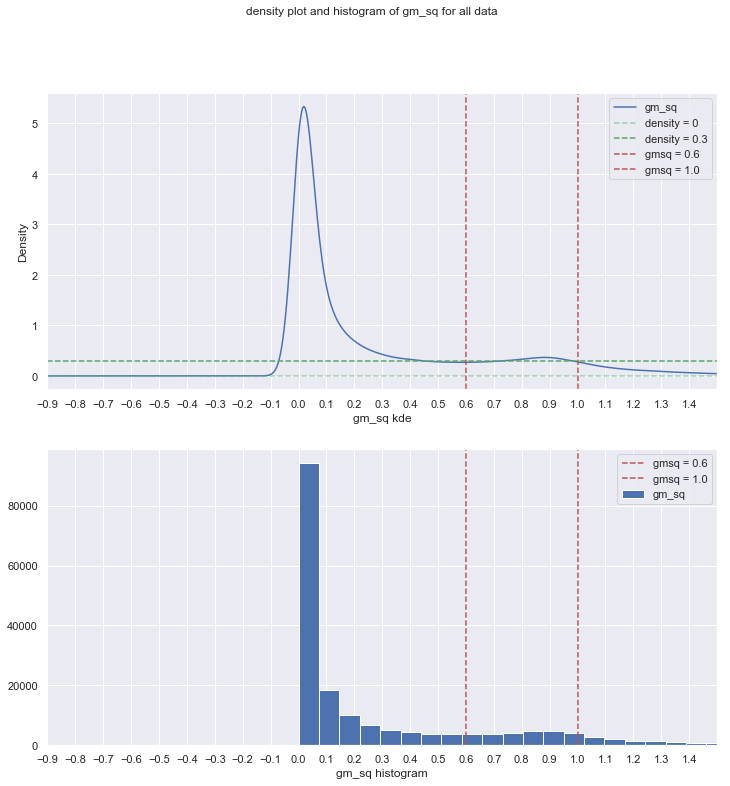

In [7]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
df['gm_sq'].plot.kde(ax=ax[0])

df['gm_sq'].hist(ax=ax[1], label='gm_sq',bins=30)

# labels
ax[0].set_xlabel('gm_sq kde')
ax[1].set_xlabel('gm_sq histogram')

# limits
ax[0].set_xlim(-0.9,1.5)
ax[1].set_xlim(-0.19,1.5)

# hr line
ax[0].axhline(y=0,c='g',ls='--', label='density = 0',alpha=0.5)
ax[0].axhline(y=0.3,c='g',ls='--', label='density = 0.3')

# vr line
ax[0].axvline(x=0.6,c='r',ls='--',label='gmsq = 0.6')
ax[0].axvline(x=1.0,c='r',ls='--', label='gmsq = 1.0')
ax[1].axvline(x=0.6,c='r',ls='--',label='gmsq = 0.6')
ax[1].axvline(x=1.0,c='r',ls='--', label='gmsq = 1.0')

# ticks
ax[0].set_xticks(np.arange(-0.9,1.5,0.1))
ax[1].set_xticks(np.arange(-0.9,1.5,0.1))

# legend
ax[0].legend()
ax[1].legend()
plt.suptitle('density plot and histogram of gm_sq for all data')
plt.show()

# NOTE: kernel density plot also shows curve below 0, but square value less
#       than 0 is unphysical. We can look at histogram for the data distribution.

# Distribution of gmsq Zoom

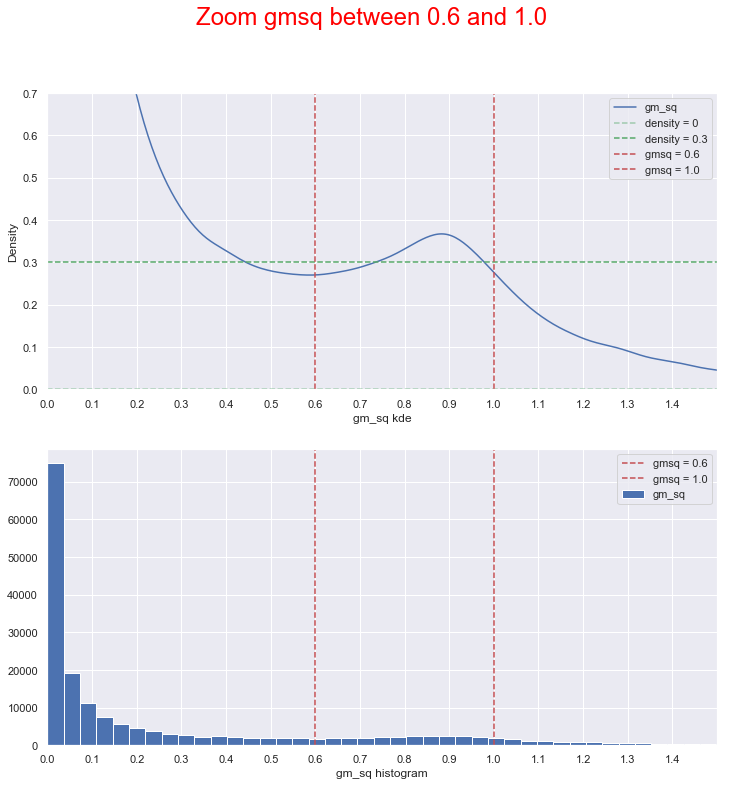

In [8]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
df['gm_sq'].plot.kde(ax=ax[0])

df['gm_sq'].hist(ax=ax[1], label='gm_sq',bins=60)

ax[0].set_xlabel('gm_sq kde')
ax[1].set_xlabel('gm_sq histogram')

ax[0].set_xlim(0,1.5)
ax[1].set_xlim(0,1.5)

# zoom y-axis
ax[0].set_ylim(0,0.7)

# ticks
ax[0].set_xticks(np.arange(0,1.5,0.1))
ax[1].set_xticks(np.arange(0,1.5,0.1))

# hr lines
ax[0].axhline(y=0,c='g',ls='--', label='density = 0',alpha=0.5)
ax[0].axhline(y=0.3,c='g',ls='--', label='density = 0.3')

# vr lines
ax[0].axvline(x=0.6,c='r',ls='--',label='gmsq = 0.6')
ax[0].axvline(x=1.0,c='r',ls='--', label='gmsq = 1.0')
ax[1].axvline(x=0.6,c='r',ls='--',label='gmsq = 0.6')
ax[1].axvline(x=1.0,c='r',ls='--', label='gmsq = 1.0')

# legend
ax[0].legend()
ax[1].legend()
plt.suptitle('Zoom gmsq between 0.6 and 1.0',fontsize=24,color='red')
plt.show()

# Script

In [9]:
%%writefile b02_plot_gmsq.py
# Author: Bhishan Poudel
# Date:  Nov 1, 2019

import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

pd.set_option('display.max_columns',200)

import matplotlib.pyplot as plt

if not os.path.isdir('results'):
    os.makedirs('results')


#===============================================================================
colnames = """fN[0][0]       fN[1][0]       fN[2][0]       fN[3][0]
id[0][0]       id[1][0]       id[2][0]       id[3][0]
x[0] x[1]     
errx[0][0]     errx[0][1]     errx[1][0]     errx[1][1]
errx[2][0]     errx[2][1]     errx[3][0]     errx[3][1]
g[0][0]        g[0][1]        g[1][0]        g[1][1] 
g[2][0]        g[2][1]        g[3][0]        g[3][1]
shear[0][0]    shear[1][0]    shear[2][0]    shear[3][0]
flux[0][0]     flux[1][0]     flux[2][0]     flux[3][0]
radius[0][0]   radius[1][0]   radius[2][0]   radius[3][0]
gm[0]          gm[1]          gc[0]          gc[1]
""".split()

colnames = [i.strip() for i in colnames]

#===============================================================================
# final_text is obtained from imcat after combining m,m9,l,l9 text files
df = pd.read_csv('final/final_text.txt',sep=r'\s+',
                 comment='#',header=None)

df.columns = colnames

#===============================================================================
# Find total flux, gm**2 and gc**2
df['flux'] = df['flux[0][0]'] + df['flux[1][0]'] + df['flux[2][0]'] + df['flux[3][0]']
df['gm_sq'] = df['gm[0]']**2 + df['gm[1]']**2
df['gc_sq'] = df['gc[0]']**2 + df['gc[1]']**2

#===============================================================================
df_06_10 = df.query("0.6 < gm_sq < 1.0")

with open('results/a00_output.txt','w') as fo:
    print('all objects = {:,}'.format(len(df)), file=fo)
    print('bad objects = {:,}'.format(len(df_06_10)), file=fo)
    print('bad objects percentage = {:.2f}% '.format(len(df_06_10)/len(df)*100),file=fo )

#===============================================================================
fig, ax = plt.subplots(2,1,figsize=(12,12))

# kde and histogram
df['gm_sq'].plot.kde(ax=ax[0])
df['gm_sq'].hist(ax=ax[1], label='gm_sq',bins=60)

# labels
ax[0].set_xlabel('gm_sq kde')
ax[1].set_xlabel('gm_sq histogram')

# limits
ax[0].set_xlim(0,1.5)
ax[1].set_xlim(0,1.5)

# ticks
ax[0].set_xticks(np.arange(0,1.5,0.1))
ax[1].set_xticks(np.arange(0,1.5,0.1))

# hr lines
ax[0].axhline(y=0,c='g',ls='--', label='density = 0',alpha=0.5)
ax[0].axhline(y=0.25,c='g',ls='--', label='density = 0.25')

# vr lines
ax[0].axvline(x=0.6,c='r',ls='--',label='gmsq = 0.6')
ax[0].axvline(x=1.0,c='r',ls='--', label='gmsq = 1.0')
ax[1].axvline(x=0.6,c='r',ls='--',label='gmsq = 0.6')
ax[1].axvline(x=1.0,c='r',ls='--', label='gmsq = 1.0')

# legends
ax[0].legend()
ax[1].legend()
plt.suptitle('density plot and histogram of gm_sq for all data')
plt.savefig('results/a01_gmsq_kde_whole_data.png')

# zoom y-axis
ax[0].set_ylim(0,0.7)
plt.savefig('results/a02_gmsq_kde_zoom.png')

plt.show()

Overwriting b02_plot_gmsq.py
